In [1]:
import pickle
import numpy as np
import cv2
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import h5py
import keras
from keras.models import Model, Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Concatenate, Dense
from keras.layers import Flatten, Dropout, Reshape
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import AveragePooling2D

from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib
import os
import tensorflow as tf
from PIL import Image

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import skimage
import skimage.io as io

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print (keras.__version__)

2.0.8


In [3]:
def network():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(4))
    model.add(Activation('softmax'))

    return model


In [4]:
image_shape = (32, 32, 3)
nb_classes = 3
def network2():
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=image_shape))
  model.add(Activation('relu'))
  model.add(Convolution2D(32, 3, 3))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Convolution2D(64, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  model.add(Convolution2D(64, 3, 3))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))


  return model

In [5]:
def train(file_path, model):

    x_,y_ = pickle.load( open(file_path, "rb" ) )
    random_state = 130
    X_train, x_validation, y_train, y_validation = train_test_split(x_, y_, train_size = 0.80,
                                                                    test_size = 0.2,
                                                                    random_state = random_state)
    # preprocess data
    X_normalized = np.array(X_train / 255.0 - 0.5 )
    label_binarizer = LabelBinarizer()
    y_one_hot = label_binarizer.fit_transform(y_train)

    model.summary()
    model.compile('adam', 'categorical_crossentropy', ['accuracy'])
    history = model.fit(X_normalized, y_one_hot, nb_epoch=20, validation_split=0.2)

    model.save('model.h5')
    return history


In [6]:
model = network2()
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import tensorflow as tf
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import skimage
import skimage.io as io

In [14]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red_dir = base_path + 'training_data/01red'
yellow_dir = base_path + 'training_data/yellow'
green_dir = base_path + 'training_data/01green'

In [15]:
#red_dir = '/home/stack/DATA/red'
#yellow_dir = '/home/stack//DATA/yellow'
#green_dir = '/home/stack//DATA/green'

In [16]:

red_listing = os.listdir(red_dir) 
num_red_images = size(red_listing)
yellow_listing = os.listdir(yellow_dir) 
num_yellow_images = size(yellow_listing)
green_listing = os.listdir(green_dir) 
num_green_images = size(green_listing)

print ('red images = ', num_red_images)
print ('yellow images = ', num_yellow_images)
print ('green images = ', num_green_images)

('red images = ', 60)
('yellow images = ', 25)
('green images = ', 61)


In [19]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red_resized_dir = base_path + 'training_data/01red_resized'
yellow_resized_dir = base_path + 'training_data/yellow_resized'
green_resized_dir = base_path + 'training_data/01green_resized'

red_resized_listing = os.listdir(red_resized_dir) 
num_red_images = size(red_resized_listing)
yellow_resized_listing = os.listdir(yellow_resized_dir) 
num_yellow_images = size(yellow_resized_listing)
green_resized_listing = os.listdir(green_resized_dir) 
num_green_images = size(green_resized_listing)

print ('red images = ', num_red_images)
print ('yellow images = ', num_yellow_images)
print ('green images = ', num_green_images)

('red images = ', 0)
('yellow images = ', 0)
('green images = ', 0)


In [22]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red_resized_dir = base_path + 'training_data/01red_resized'
yellow_resized_dir = base_path + 'training_data/yellow_resized'
green_resized_dir = base_path + 'training_data/01green_resized'

In [24]:
img_rows = 32
img_cols = 32
TARGET_NUMBER = 100
TARGET_COUNT = 0
for file in red_listing:
    if '.DS_Store' in file:
        break
#    TARGET_COUNT += 1
#    if TARGET_COUNT > TARGET_NUMBER:
#        break
    
    img = Image.open(red_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(red_resized_dir+'/'+'01red_'+file,"JPEG")

In [31]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red3_dir = base_path + 'training_data/03red'
red_resized_dir = base_path + 'training_data/01red_resized'

red3_listing = os.listdir(red3_dir) 
img_rows = 32
img_cols = 32
TARGET_NUMBER = 100
TARGET_COUNT = 0
for file in red3_listing:
    if '.DS_Store' in file:
        break
#    TARGET_COUNT += 1
#    if TARGET_COUNT > TARGET_NUMBER:
#        break
    
    img = Image.open(red3_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(red_resized_dir+'/'+'03red_'+file,"JPEG")

In [32]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red4_dir = base_path + 'training_data/03red'
red_resized_dir = base_path + 'training_data/01red_resized'

red4_listing = os.listdir(red3_dir) 
img_rows = 32
img_cols = 32
TARGET_NUMBER = 100
TARGET_COUNT = 0
for file in red4_listing:
    if '.DS_Store' in file:
        break
#    TARGET_COUNT += 1
#    if TARGET_COUNT > TARGET_NUMBER:
#        break
    
    img = Image.open(red4_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(red_resized_dir+'/'+'04red_'+file,"JPEG")

In [77]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red_base_dir = base_path + 'training_data/red_base'
red_final_dir = base_path + 'training_data/red_final'

red_base_listing = os.listdir(red_base_dir) 
img_rows = 32
img_cols = 32
TARGET_NUMBER = 100
TARGET_COUNT = 0
for file in red_base_listing:
    if '.DS_Store' in file:
        break
    TARGET_COUNT += 1
    if TARGET_COUNT > TARGET_NUMBER:
        break
    
    img = Image.open(red_base_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(red_final_dir+'/'+'red_final'+file,"JPEG")

In [72]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
yellow_base_dir = base_path + 'training_data/yellow_base'
yellow_final_dir = base_path + 'training_data/yellow_final'

yellow_base_listing = os.listdir(yellow_base_dir) 
img_rows = 32
img_cols = 32
TARGET_NUMBER = 20
TARGET_COUNT = 0
for file in yellow_base_listing:
    if '.DS_Store' in file:
        break
    TARGET_COUNT += 1
    if TARGET_COUNT > TARGET_NUMBER:
        break
    
    img = Image.open(yellow_base_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(yellow_final_dir+'/'+'yellow_final'+file,"JPEG")

In [73]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
green_base_dir = base_path + 'training_data/green_base'
green_final_dir = base_path + 'training_data/green_final'

green_base_listing = os.listdir(green_base_dir) 
img_rows = 32
img_cols = 32
TARGET_NUMBER = 50
TARGET_COUNT = 0
for file in green_base_listing:
    if '.DS_Store' in file:
        break
    TARGET_COUNT += 1
    if TARGET_COUNT > TARGET_NUMBER:
        break
    
    img = Image.open(green_base_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(green_final_dir+'/'+'green_final'+file,"JPEG")

In [78]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red_final_dir = base_path + 'training_data/red_final'
yellow_final_dir = base_path + 'training_data/yellow_final'
green_final_dir = base_path + 'training_data/green_final'

red_final_listing = os.listdir(red_final_dir) 
num_red_images = size(red_final_listing)
yellow_final_listing = os.listdir(yellow_final_dir) 
num_yellow_images = size(yellow_final_listing)
green_final_listing = os.listdir(green_final_dir) 
num_green_images = size(green_final_listing)

print ('red images = ', num_red_images)
print ('yellow images = ', num_yellow_images)
print ('green images = ', num_green_images)

('red images = ', 100)
('yellow images = ', 20)
('green images = ', 50)


In [79]:
red_final_path = red_final_dir+'/'
yellow_final_path = yellow_final_dir+'/'
green_final_path = green_final_dir+'/'

print (red_final_path)

x_train = []
img_matrix = []
all_images = []
for image_path in os.listdir(red_final_path):

  img = io.imread(red_final_path+image_path, as_grey=False)
  all_images.append(img)
    
for image_path in os.listdir(yellow_final_path):
  img = io.imread(yellow_final_path+image_path, as_grey=False)
  all_images.append(img) 
   
for image_path in os.listdir(green_final_path):
  img = io.imread(green_final_path+image_path, as_grey=False)
  all_images.append(img)
    
img_matrix = np.array(all_images)

/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/training_data/red_final/


In [80]:


red_resized_listing = os.listdir(red_final_dir) 
num_red_images = size(red_final_listing)
yellow_final_listing = os.listdir(yellow_final_dir) 
num_yellow_images = size(yellow_final_listing)
green_final_listing = os.listdir(green_final_dir) 
num_green_images = size(green_final_listing)

print ('red images = ', num_red_images)
print ('yellow images = ', num_yellow_images)
print ('green images = ', num_green_images)

('red images = ', 100)
('yellow images = ', 20)
('green images = ', 50)


In [81]:
print (img_matrix[0])

[[[153 171 211]
  [135 155 192]
  [149 174 204]
  ...
  [164 170 192]
  [147 154 173]
  [157 162 182]]

 [[143 163 200]
  [132 152 185]
  [136 157 186]
  ...
  [  0   0  18]
  [ 49  52  71]
  [163 164 182]]

 [[159 186 215]
  [139 163 189]
  [  9  27  51]
  ...
  [  1   0  14]
  [  0   0  12]
  [ 30  26  41]]

 ...

 [[163 193 227]
  [126 153 183]
  [  7  27  52]
  ...
  [  0   3  18]
  [  5  14  31]
  [  0   1  18]]

 [[149 184 224]
  [148 181 216]
  [174 199 230]
  ...
  [ 27  42  63]
  [126 141 164]
  [186 202 225]]

 [[167 206 249]
  [142 177 217]
  [161 190 224]
  ...
  [154 170 195]
  [161 178 204]
  [145 162 188]]]


In [83]:
#num_samples = 1437
num_samples = 170
label=np.zeros((num_samples,),dtype = int)
label[0:101]=0
label[101:122]=1
label[122:]=2

In [84]:
data,Label = shuffle(img_matrix,label, random_state=2)
train_data = [data,Label]

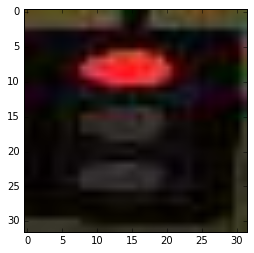

In [86]:
img=img_matrix[0]
plt.imshow(img)


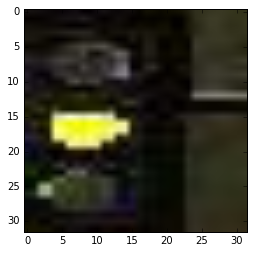

In [87]:
img=img_matrix[100]
plt.imshow(img)

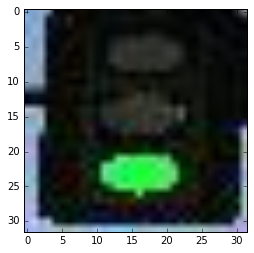

In [89]:
img=img_matrix[151]
plt.imshow(img)

In [90]:
print (train_data[0].shape)
print (train_data[1].shape)

(170, 32, 32, 3)
(170,)


In [91]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [92]:
#%%
(X, y) = (train_data[0],train_data[1])


# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [93]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [94]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (136, 32, 32, 3))
(136, 'train samples')
(34, 'test samples')


In [95]:
nb_classes = 3
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [96]:
model = network2()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


In [97]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

history = model.fit(X_train, Y_train, nb_epoch=20,verbose=1, validation_split=0.2)

model.save('AVO7_v1_model.h5')
 

/usr/local/lib/python2.7/dist-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 108 samples, validate on 28 samples
Epoch 1/20
108/108 [==============================] - 0s - loss: 0.9110 - acc: 0.4907 - val_loss: 0.3841 - val_acc: 0.9286
Epoch 2/20
108/108 [==============================] - 0s - loss: 0.4011 - acc: 0.8611 - val_loss: 0.0555 - val_acc: 1.0000
Epoch 3/20
108/108 [==============================] - 0s - loss: 0.1787 - acc: 0.9630 - val_loss: 0.0325 - val_acc: 1.0000
Epoch 4/20
108/108 [==============================] - 0s - loss: 0.1916 - acc: 0.9444 - val_loss: 0.0184 - val_acc: 1.0000
Epoch 5/20
108/108 [==============================] - 0s - loss: 0.1162 - acc: 0.9630 - val_loss: 0.0175 - val_acc: 1.0000
Epoch 6/20
108/108 [==============================] - 0s - loss: 0.1691 - acc: 0.9630 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 7/20
108/108 [==============================] - 0s - loss: 0.1304 - acc: 0.9722 - val_loss: 0.0318 - val_acc: 1.0000
Epoch 8/20
108/108 [==============================] - 0s - loss: 0.1252 - acc: 0.9722 - val_lo

In [98]:
model=load_model('AVO7_v1_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [99]:
print("Testing")

metrics = model.evaluate(X_test, Y_test)

Testing
32/34 [===========================>..] - ETA: 0s

In [100]:
for metric_i in range(len(model.metrics_names)):
        metric_name = model.metrics_names[metric_i]
        metric_value = metrics[metric_i]
        print('{}: {}'.format(metric_name, metric_value))

loss: 0.0257756604868
acc: 1.0


1/1 [==============================] - 0s
[2]
GREEN


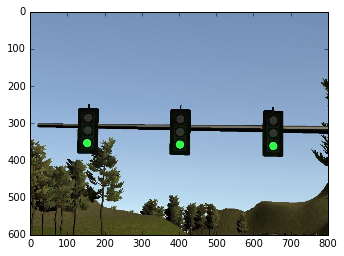

In [127]:
base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red_base_dir = base_path + 'training_data/red_base'
yellow_base_dir = base_path + 'training_data/yellow_base'
green_base_dir = base_path + 'training_data/green_base'

red_final_dir = base_path + 'training_data/red_final'
yellow_final_dir = base_path + 'training_data/yellow_final'
green_final_dir = base_path + 'training_data/green_final'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/red6.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/green.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/yellow2.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/image1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/roi8.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_2.jpg'

#file_path = '/home/stack/DATA/red_resized/red_resizedleft8804.jpg'
#file_path = '/home/stack/DATA/yellow_resized/left8711.jpg'
#file_path = '/home/stack/DATA/green_resized/left8691.jpg'
file_path = '/home/stack/DATA/green_test.jpg'
#file_path = '/home/stack/DATA/102.jpg'

#file_path = '/home/stack/DATA/red/left8804.jpg'
#file_path = '/home/stack/DATA/green/left8691.jpg'
#file_path = '/home/stack/DATA/green-crop1.png'
#file_path = '/home/stack/DATA/yellow-crop1.jpg'
#ile_path = red_base_dir+'/19red_light_image9.jpg'
#file_path = yellow_base_dir+'/01yellow_light_image9.jpg'
#file_path = green_base_dir+'/02green_light_image95.jpg'


desired_dim=(32,32)
img = cv2.imread(file_path)
img_resized = cv2.resize(img, desired_dim, interpolation=cv2.INTER_LINEAR)
img_ = np.expand_dims(np.array(img_resized), axis=0)

plt.imshow(img)
classes = model.predict_classes(img_)

print (classes)
if classes == 2:
    print ("GREEN")
if classes == 1:
    print ("YELLOW")
if classes == 0:
    print ("RED")


1/1 [==============================] - 0s
[0]
RED


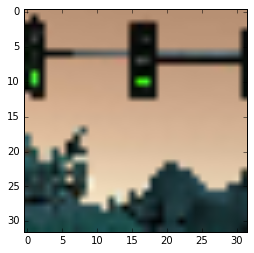

In [123]:
from keras.preprocessing import image
# Classes = { 1: red, 2: yellow, 3: green, 4:off}

base_path = '/home/stack/CARLA_MILESTONE4/CarND-Capstone/ros/src/tl_detector/'
red_base_dir = base_path + 'training_data/red_base'
yellow_base_dir = base_path + 'training_data/yellow_base'
green_base_dir = base_path + 'training_data/green_base'

red_final_dir = base_path + 'training_data/red_final'
yellow_final_dir = base_path + 'training_data/yellow_final'
green_final_dir = base_path + 'training_data/green_final'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/red6.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/green.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/yellow.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_2.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/image1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/roi1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/roi8.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/left0073.jpg'


#file_path = '/root/TRAFFIC/TRAFFIC/DATA/red_resized/red_resizedleft8804.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/yellow_resized/left8711.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/green_resized/left8687.jpg'

#file_path = '/root/TRAFFIC/TRAFFIC/DATA/red/left8804.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/green/left8687.jpg'
#file_path = '/home/stack/DATA/yellow/left8711.jpg'
#file_path = '/home/stack/DATA/red.jpg'
file_path = '/home/stack/DATA/102.jpg'
#file_path = '/home/stack/DATA/green-crop1.png'
#file_path = '/home/stack/DATA/yellow-crop1.jpg'
#file_path = '/home/stack/DATA/yellow-crop1.jpg'
#ile_path = red_base_dir+'/19red_light_image9.jpg'
#file_path = yellow_base_dir+'/01yellow_light_image9.jpg'
#file_path = green_base_dir+'/02green_light_image95.jpg'

image1  = image.load_img(file_path, target_size=(32,32))
x = image.img_to_array(image1)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=1)

plt.imshow(image1)


#y_classes = np_utils.argmax(classes)
#y_classes = keras.np_utils.probas_to_classes(y_proba)


#generator= train_datagen.flow_from_directory("./", batch_size=batch_size)
#label_map = (generator.class_indices)

#print ('Class Predicted = ', label_map)

print (classes)
if classes == 2:
    print ("GREEN")
if classes == 1:
    print ("YELLOW")
if classes == 0:
    print ("RED")

